<a href="https://colab.research.google.com/github/JyLee98ImTrying/AA2/blob/main/PredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Ingestion: mount google drive and create a df from a csv file
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/HealthData.csv')

Mounted at /content/drive


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
print(df.isnull().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


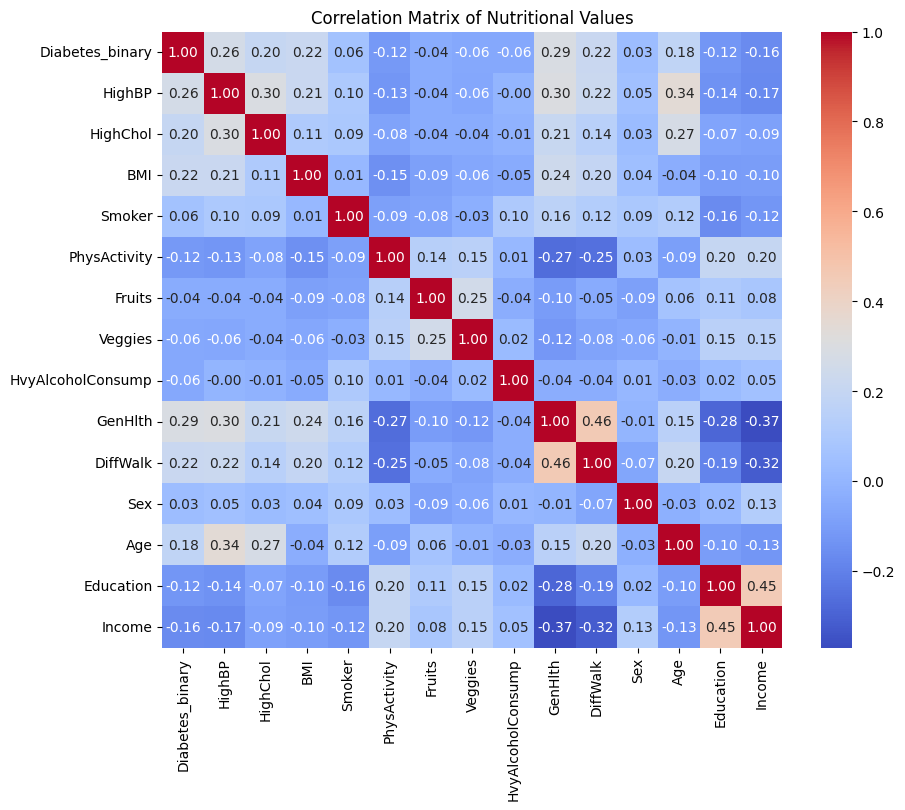

In [ ]:
#Selecting relevant columns
col = ['Diabetes_binary','HighBP','HighChol','BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump','GenHlth','DiffWalk','Sex','Age','Education','Income']

# Correlation matrix
corr_matrix = df[col].corr()


# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Nutritional Values')
plt.show()

## Feature Selection & Train Test Split

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#List of selected features = ['Diabetes_binary','HighBP','HighChol','BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump','GenHlth','DiffWalk','Sex','Age','Education','Income']

selected_features = ['Diabetes_binary','HighBP','HighChol','BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump','Sex','Age','Education','Income']

df2 = df[selected_features]

# Define the features (X) and target (y)
X = df2.drop(columns=['Diabetes_binary', 'HighBP', 'HighChol'])
y = df2[['Diabetes_binary', 'HighBP', 'HighChol']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## Machine learning training

### Single Lable Classification

In [ ]:
# Define a function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, condition):
    model.fit(X_train, y_train[condition])
    y_pred = model.predict(X_test)
    print(f"Evaluation for {condition}:")
    print(classification_report(y_test[condition], y_pred))
    print(f"Accuracy: {accuracy_score(y_test[condition], y_pred)}")
    print("-" * 50)

# Instantiate the models
xgb_model = XGBClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Evaluate the models for each condition (Diabetes_binary, HighBP, HighChol)
for condition in ['Diabetes_binary', 'HighBP', 'HighChol']:
    print(f"\nEvaluating {condition} with XGBoost")
    evaluate_model(xgb_model, X_train, X_test, y_train, y_test, condition)

    print(f"\nEvaluating {condition} with Random Forest")
    evaluate_model(rf_model, X_train, X_test, y_train, y_test, condition)

    print(f"\nEvaluating {condition} with Logistic Regression")
    evaluate_model(lr_model, X_train, X_test, y_train, y_test, condition)


Evaluating Diabetes_binary with XGBoost
Evaluation for Diabetes_binary:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92     65605
         1.0       0.48      0.06      0.11     10499

    accuracy                           0.86     76104
   macro avg       0.67      0.53      0.52     76104
weighted avg       0.81      0.86      0.81     76104

Accuracy: 0.8612687900767371
--------------------------------------------------

Evaluating Diabetes_binary with Random Forest
Evaluation for Diabetes_binary:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     65605
         1.0       0.32      0.17      0.22     10499

    accuracy                           0.84     76104
   macro avg       0.60      0.56      0.56     76104
weighted avg       0.80      0.84      0.81     76104

Accuracy: 0.8361058551455902
--------------------------------------------------

Evaluating Diabetes_binary with L


Evaluating feature importance for Diabetes_binary

Feature importance for Diabetes_binary using XGBoost:


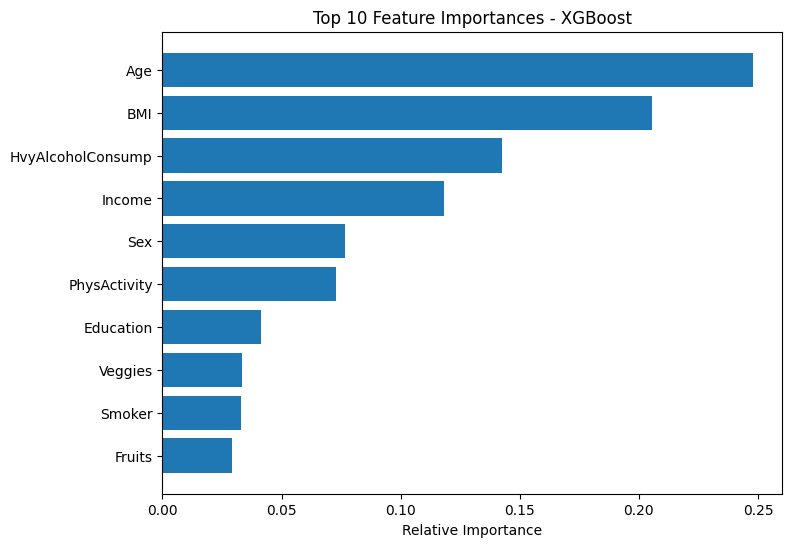


Feature importance for Diabetes_binary using Random Forest:


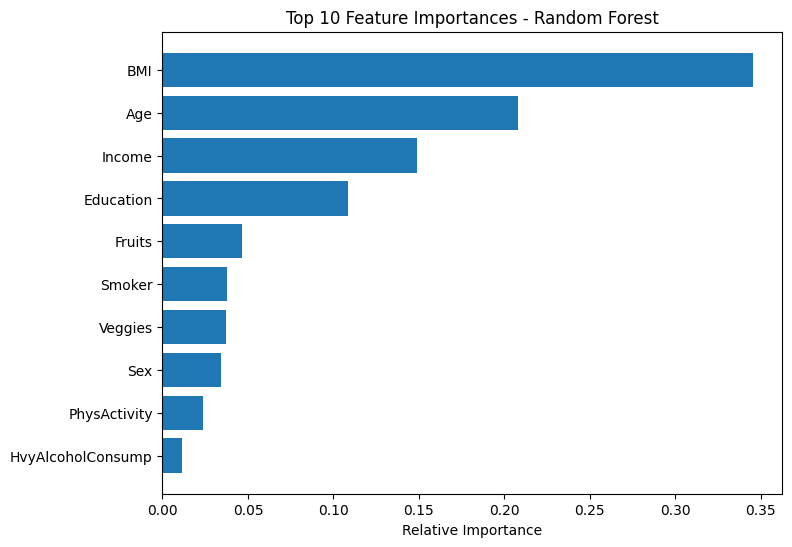


Feature importance for Diabetes_binary using Logistic Regression:


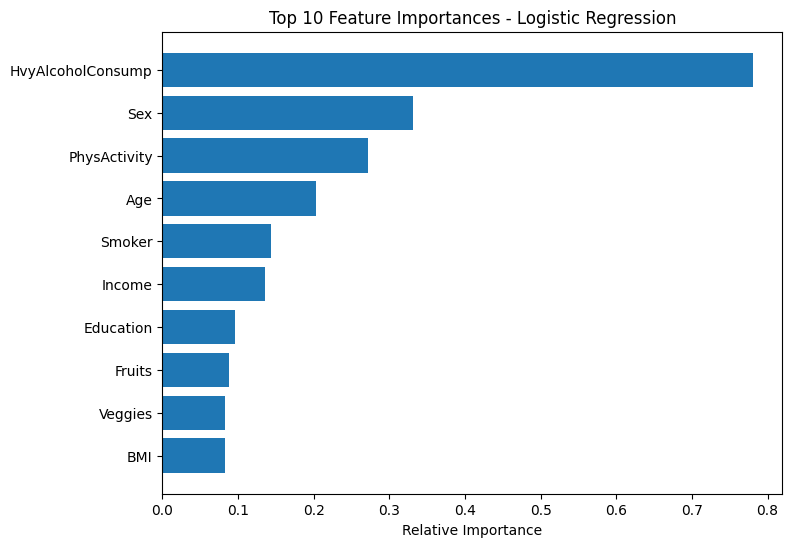


Evaluating feature importance for HighBP

Feature importance for HighBP using XGBoost:


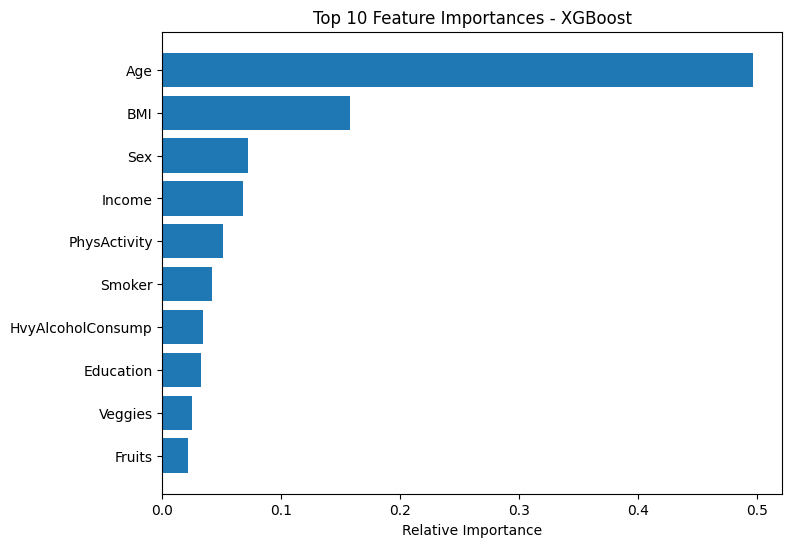


Feature importance for HighBP using Random Forest:


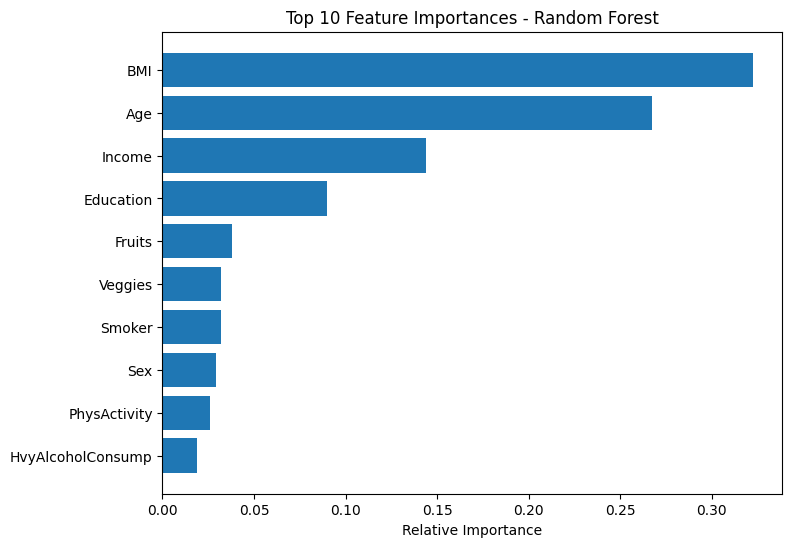


Feature importance for HighBP using Logistic Regression:


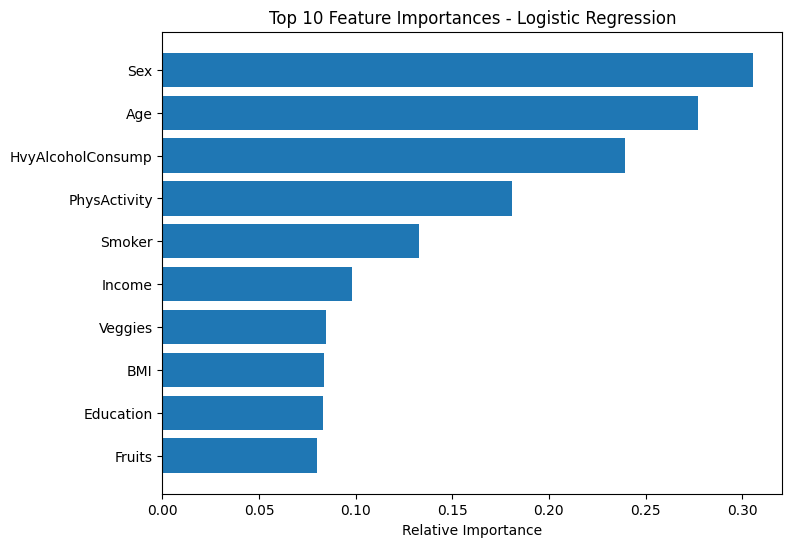


Evaluating feature importance for HighChol

Feature importance for HighChol using XGBoost:


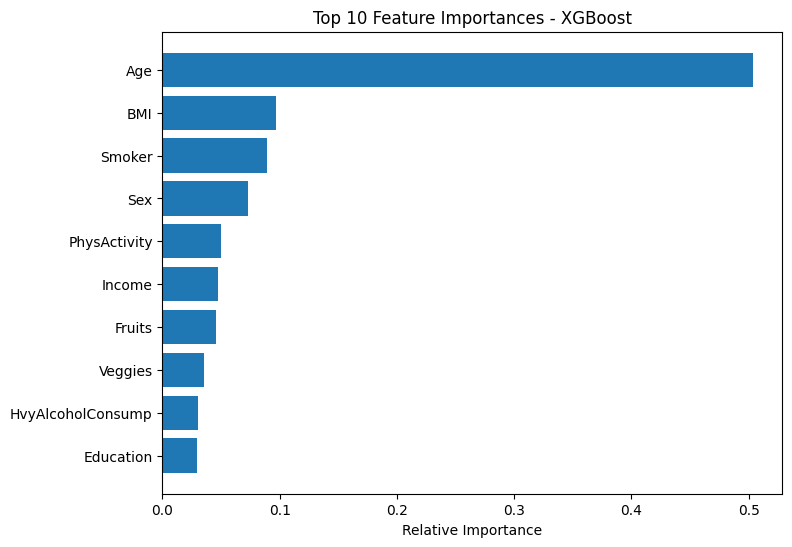


Feature importance for HighChol using Random Forest:


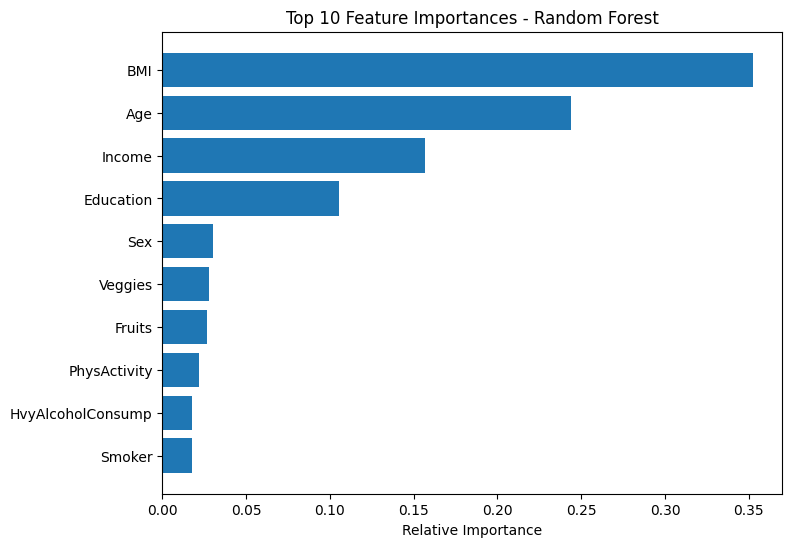


Feature importance for HighChol using Logistic Regression:


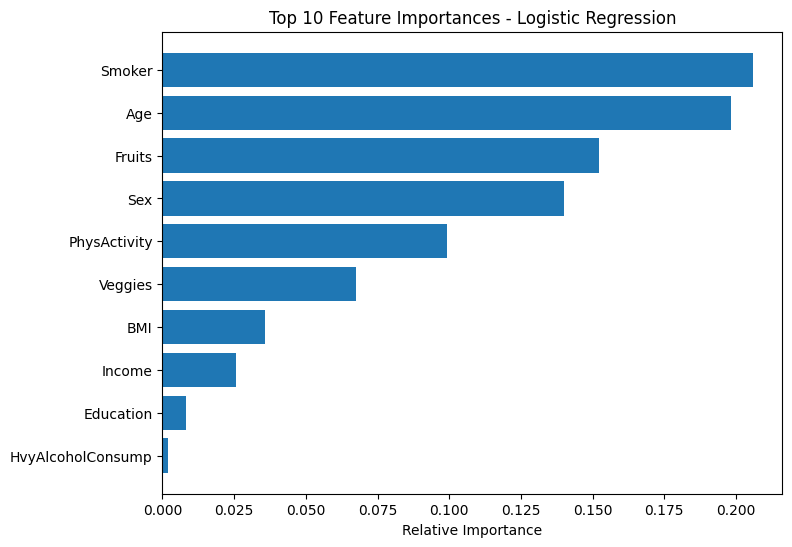

In [ ]:
#Variance Importance
import matplotlib.pyplot as plt
import numpy as np

# Function to plot feature importance
def plot_feature_importance(importance, features, model_name, top_n=10):
    indices = np.argsort(importance)[-top_n:]  # Get top_n features
    plt.figure(figsize=(8, 6))
    plt.title(f"Top {top_n} Feature Importances - {model_name}")
    plt.barh(range(len(indices)), importance[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

# For XGBoost
def xgboost_feature_importance(xgb_model, X, condition):
    importance = xgb_model.feature_importances_
    print(f"\nFeature importance for {condition} using XGBoost:")
    plot_feature_importance(importance, X.columns, 'XGBoost')

# For RandomForest
def random_forest_feature_importance(rf_model, X, condition):
    importance = rf_model.feature_importances_
    print(f"\nFeature importance for {condition} using Random Forest:")
    plot_feature_importance(importance, X.columns, 'Random Forest')

# For Logistic Regression (using coefficients)
def logistic_regression_feature_importance(lr_model, X, condition):
    importance = np.abs(lr_model.coef_[0])  # Absolute values of coefficients
    print(f"\nFeature importance for {condition} using Logistic Regression:")
    plot_feature_importance(importance, X.columns, 'Logistic Regression')

# Call the functions for feature importance after training
for condition in ['Diabetes_binary', 'HighBP', 'HighChol']:
    print(f"\nEvaluating feature importance for {condition}")

    # XGBoost Feature Importance
    xgb_model.fit(X_train, y_train[condition])  # Refit if needed
    xgboost_feature_importance(xgb_model, X_train, condition)

    # Random Forest Feature Importance
    rf_model.fit(X_train, y_train[condition])  # Refit if needed
    random_forest_feature_importance(rf_model, X_train, condition)

    # Logistic Regression Feature Importance
    lr_model.fit(X_train, y_train[condition])  # Refit if needed
    logistic_regression_feature_importance(lr_model, X_train, condition)


### Multilable Classification

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multioutput import MultiOutputClassifier

# Define the features and target
X_M = df2.drop(columns=['Diabetes_binary', 'HighBP', 'HighChol'])
y_M = df2[['Diabetes_binary', 'HighBP', 'HighChol']]

# Binarize the y labels for multilabel classification
mlb = MultiLabelBinarizer()
y_mlb = mlb.fit_transform(y.apply(lambda row: tuple([idx for idx, val in row.items() if val == 1]), axis=1))

# Split the data into training and testing sets
X_M_train, X_M_test, y_M_train, y_M_test = train_test_split(X_M, y_mlb, test_size=0.3, random_state=42)

# Define and train the model
model = MultiOutputClassifier(XGBClassifier(random_state=42))
model.fit(X_M_train, y_M_train)

# Prediction and evaluation
y_M_pred = model.predict(X_M_test)
print(f"Classification Report:\n{classification_report(y_M_test, y_M_pred, target_names=mlb.classes_)}")

Classification Report:
                 precision    recall  f1-score   support

Diabetes_binary       0.48      0.06      0.11     10499
         HighBP       0.65      0.65      0.65     32735
       HighChol       0.57      0.56      0.57     32404

      micro avg       0.61      0.53      0.57     75638
      macro avg       0.57      0.42      0.44     75638
   weighted avg       0.59      0.53      0.54     75638
    samples avg       0.30      0.31      0.29     75638



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
